In [ ]:
# Instalar dependências necessárias
!pip install tensorflow opencv-python-headless matplotlib mtcnn --quiet

# Verificar as versões
import tensorflow as tf
import cv2
import matplotlib
import mtcnn

print(f"TensorFlow Version: {tf.__version__}")
print(f"OpenCV Version: {cv2.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
TensorFlow Version: 2.17.1
OpenCV Version: 4.10.0
Matplotlib Version: 3.8.0


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset


In [ ]:
!unzip celeba-dataset.zip -d /content/dataset


In [ ]:
import os
os.listdir('/content/dataset')


['img_align_celeba',
 'list_bbox_celeba.csv',
 'list_landmarks_align_celeba.csv',
 'list_attr_celeba.csv',
 'list_eval_partition.csv']

In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Caminho das imagens
image_folder = '/content/dataset/img_align_celeba/img_align_celeba'

# Ler os arquivos CSV
df = pd.read_csv('/content/dataset/list_attr_celeba.csv')

# Amostrar 1% dos dados
df_sampled = df.sample(frac=0.01, random_state=42)

# Pre-processar as imagens e atributos
def load_images(df, image_folder):
    images = []
    labels = []

    for index, row in df.iterrows():
        img_path = os.path.join(image_folder, row['image_id'])
        image = cv2.imread(img_path)
        image = cv2.resize(image, (128, 128))  # Ajustar para o tamanho necessário
        image = image / 255.0  # Normalizar para a escala [0, 1]

        # Atributos - você pode usar qualquer coluna de atributos que desejar
        label = row[1:].values  # Usar os atributos das faces como rótulos

        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

# Carregar imagens e atributos com a amostra
images, labels = load_images(df_sampled, image_folder)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verificar os dados carregados
print(f"Imagens de treino: {X_train.shape}")
print(f"Imagens de teste: {X_test.shape}")


Imagens de treino: (1620, 128, 128, 3)
Imagens de teste: (406, 128, 128, 3)


In [ ]:
!pip install mtcnn


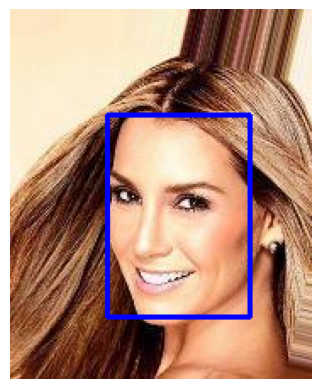

In [ ]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# Inicializar o detector
detector = MTCNN()

# Função para detectar faces
def detect_faces(image):
    result = detector.detect_faces(image)
    return result

# Visualizar uma imagem com as faces detectadas
def visualize_detection(image, detections):
    for detection in detections:
        x, y, width, height = detection['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Testar com uma imagem
test_image = cv2.imread('/content/dataset/img_align_celeba/img_align_celeba/000001.jpg')
detections = detect_faces(test_image)
visualize_detection(test_image, detections)


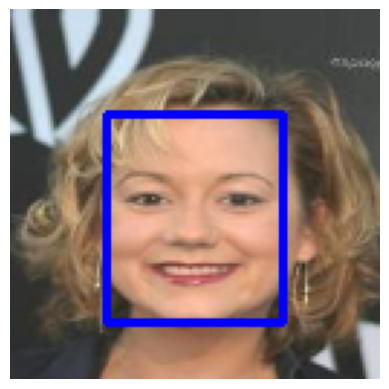

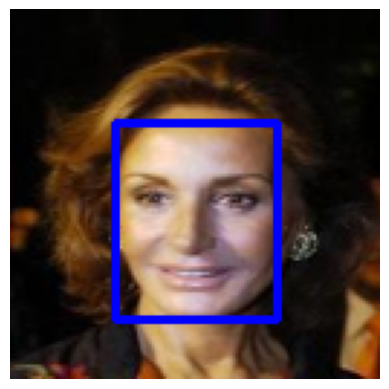

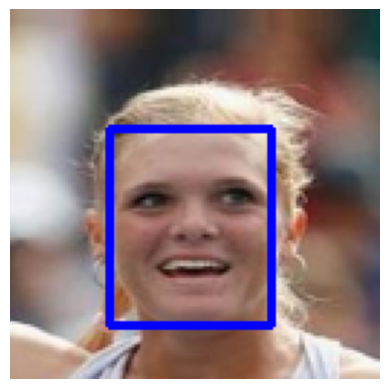

In [ ]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# Inicializar o detector
detector = MTCNN()

# Função para detectar faces
def detect_faces(image):
    result = detector.detect_faces(image)
    return result

# Visualizar uma imagem com as faces detectadas
# Visualizar uma imagem com as faces detectadas
def visualize_detection(image, detections):
    # Certifique-se de que a imagem está no formato uint8
    image_copy = (image * 255).astype('uint8')  # Reverter normalização
    for detection in detections:
        x, y, width, height = detection['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Testar com as primeiras imagens
for i in range(3):  # Visualizar 3 imagens do treino
    test_image = X_train[i].copy()
    detections = detect_faces((test_image * 255).astype('uint8'))
    visualize_detection(test_image, detections)


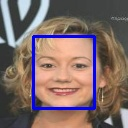

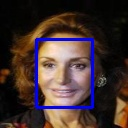

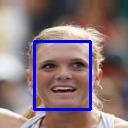

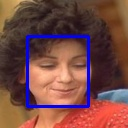

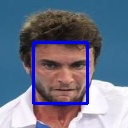

In [ ]:
output_folder = '/content/detected_faces/'
os.makedirs(output_folder, exist_ok=True)

for i, img in enumerate(X_train[:5]):  # Usar 5 imagens para exemplo
    # Reverter a normalização
    img_uint8 = (img * 255).astype('uint8')
    detections = detect_faces(img_uint8)

    for detection in detections:
        x, y, width, height = detection['box']
        cv2.rectangle(img_uint8, (x, y), (x + width, y + height), (255, 0, 0), 2)

    output_path = os.path.join(output_folder, f'detected_{i}.jpg')
    cv2.imwrite(output_path, img_uint8)

# Visualizar as imagens salvas
from IPython.display import Image, display

for i in range(5):
    display(Image(filename=f'/content/detected_faces/detected_{i}.jpg'))


In [ ]:
x, y, width, height = map(int, detection['box'])
face = img[y:y+height, x:x+width]


In [ ]:
face = img[y:y+height, x:x+width]


In [ ]:
face_resized = cv2.resize(face, (160, 160))


In [ ]:
face_normalized = face_resized / 255.0


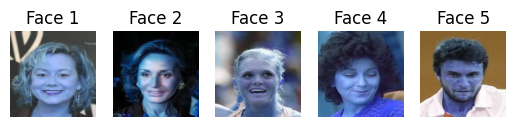

In [ ]:
import matplotlib.pyplot as plt

# Função para visualizar as faces
def visualize_faces(images, num_images=5):
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.axis('off')  # Esconder eixos
        plt.title(f"Face {i+1}")
    plt.show()

# Visualizando as primeiras 5 faces extraídas
visualize_faces(X_train[:5])  # Usando as primeiras 5 imagens de treino como exemplo


In [ ]:
import cv2

# Função para redimensionar a imagem para 128x128 pixels
def resize_face(face, target_size=(128, 128)):
    return cv2.resize(face, target_size)

# Teste o redimensionamento com uma face extraída
resized_face = resize_face(face)


In [ ]:
import numpy as np

# Função para normalizar a imagem para o intervalo [0, 1]
def normalize_face(face):
    return face / 255.0

# Teste a normalização com a face redimensionada
normalized_face = normalize_face(resized_face)


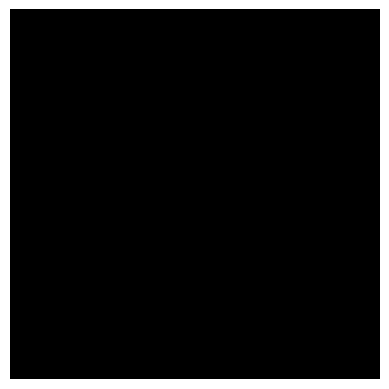

In [ ]:
import matplotlib.pyplot as plt

# Exibindo a face redimensionada e normalizada
plt.imshow(normalized_face)
plt.axis('off')  # Esconder eixos
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Carregar o modelo VGG16 pré-treinado, excluindo a camada de classificação final (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Congelar as camadas do modelo base para que elas não sejam atualizadas durante o treinamento
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas personalizadas para o nosso problema de classificação facial
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(40, activation='sigmoid')(x)  # Ajuste o número de saídas para o número de atributos (ou 2 para binário)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=output)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,850,152 (64.28 MB)

 Trainable params: 2,135,464 (8.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Certificar-se de que as imagens e rótulos estão nos tipos e formas corretas
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Se os rótulos são binários (exemplo: 1 ou 0), eles devem ser int32 ou float32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32)


51/51 ━━━━━━━━━━━━━━━━━━━━ 424s 8s/step - accuracy: 0.0591 - loss: -117.6407 - val_accuracy: 0.0000e+00 - val_loss: -1619.0701


In [ ]:
model.evaluate(X_test, y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.0000e+00 - loss: -1606.2292


[-1619.070068359375, 0.0]

In [ ]:
model.save('my_model.keras')


In [ ]:
predictions = model.predict(X_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


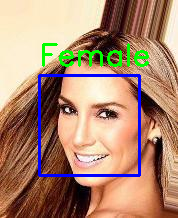

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import pandas as pd

# Carregar o modelo treinado
model = load_model('/content/modelo_face_recognition.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Carregar os atributos (modifique com o caminho correto do seu CSV)
df = pd.read_csv('/content/dataset/list_attr_celeba.csv')

# Função para detectar faces em uma imagem
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return faces

# Função para pré-processar as faces
def preprocess_face(face):
    face = cv2.resize(face, (128, 128))  # Redimensionar para o tamanho da entrada do modelo
    face = face / 255.0  # Normalizar os valores de pixels
    return np.expand_dims(face, axis=0)  # Adicionar dimensão para a batch

# Função para classificar a face
def classify_face(face):
    processed_face = preprocess_face(face)
    prediction = model.predict(processed_face)
    return prediction

# Função para visualizar a imagem com as faces detectadas e classificadas
def visualize_results(image):
    faces = detect_faces(image)
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        prediction = classify_face(face)

        label = np.argmax(prediction, axis=1)  # Retorna o rótulo da classe prevista
        # Aqui, mapeamos para "Male" ou "Female" com base na coluna do dataframe
        gender_value = df.iloc[label[0]]['Male']  # Acessa o valor para a coluna 'Male'
        label_name = 'Male' if gender_value == 1 else 'Female'

        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, label_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Exibir a imagem com as faces detectadas e rótulos
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Carregar uma imagem de exemplo
image = cv2.imread('/content/dataset/img_align_celeba/img_align_celeba/000001.jpg')

# Visualizar resultados
visualize_results(image)


Saving female.jpg to female.jpg
Arquivo female.jpg carregado com sucesso!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


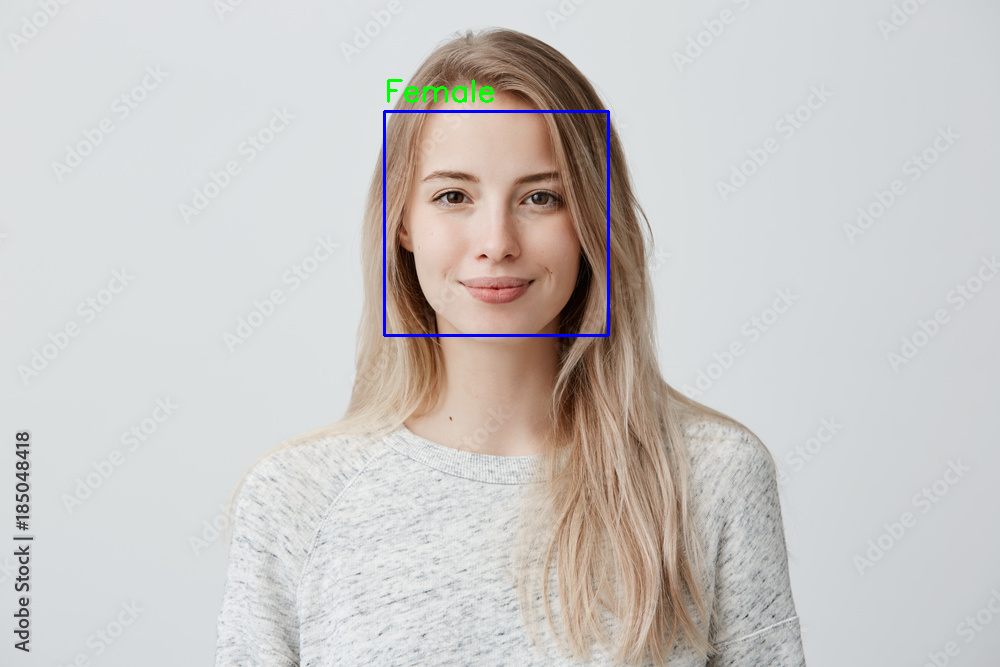

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import pandas as pd
from google.colab import files

# Carregar o modelo treinado
model = load_model('/content/modelo_face_recognition.h5')

# Carregar os atributos (modifique com o caminho correto do seu CSV)
df = pd.read_csv('/content/dataset/list_attr_celeba.csv')

# Função para detectar faces em uma imagem
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return faces

# Função para pré-processar as faces
def preprocess_face(face):
    face = cv2.resize(face, (128, 128))  # Redimensionar para o tamanho da entrada do modelo
    face = face / 255.0  # Normalizar os valores de pixels
    return np.expand_dims(face, axis=0)  # Adicionar dimensão para a batch

# Função para classificar a face
def classify_face(face):
    processed_face = preprocess_face(face)
    prediction = model.predict(processed_face)
    return prediction

# Função para classificar a imagem e exibir a classificação
def classify_uploaded_image(image_path):
    image = cv2.imread(image_path)
    faces = detect_faces(image)
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        prediction = classify_face(face)

        # Obter o índice da imagem atual
        image_index = np.argmax(prediction, axis=1)[0]  # Supondo que a previsão seja a mesma lógica

        # Verificar se o valor 'Male' é 1 ou 0 para essa imagem
        gender_value = df.iloc[image_index]['Male']

        # Mapeando 'Male' ou 'Female'
        label_name = 'Male' if gender_value == 1 else 'Female'

        # Desenhar a caixa e o rótulo
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, label_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Exibir a imagem com as faces detectadas e rótulos
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Função para upload de imagem
def upload_image():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print(f'Arquivo {fn} carregado com sucesso!')
        classify_uploaded_image(fn)

# Realizar o upload da imagem e classificá-la
upload_image()
